**What is Diabetes?**

Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

**What are the different types of diabetes?**

 The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1** diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2** diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational** diabetes Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

**Other types** of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

**About this project :-**

The objective of this project is to classify whether someone has diabetes or not.
Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

**About the Dataset**

Pregnancies :- Number of times a woman has been pregnant
Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
BloodPressure :- Diastollic Blood Pressure (mm hg)
SkinThickness :- Triceps skin fold thickness(mm)
Insulin :- 2 hour serum insulin(mu U/ml)
BMI :- Body Mass Index ((weight in kg/height in m)^2)
Age :- Age(years)
DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


**LOADING THE DATASET**

In [2]:
# Load the dataset
df=pd.read_csv('/content/diabetes.csv')

In [3]:
#Exploratory Data Analysis
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
#Data Cleaning
df=df.drop_duplicates()

In [10]:
#check for missing values, count them and print the sum for every column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [12]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

**Exploratory Data Analysis**

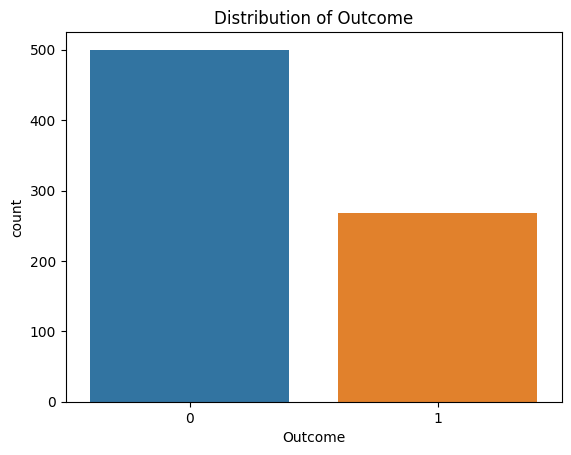

In [13]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

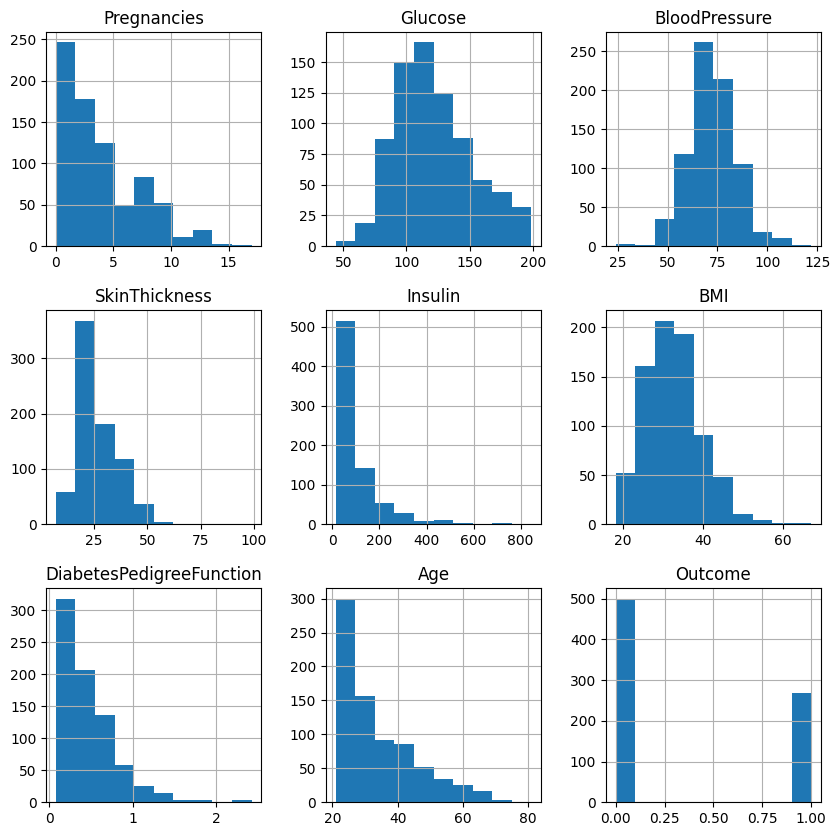

In [14]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

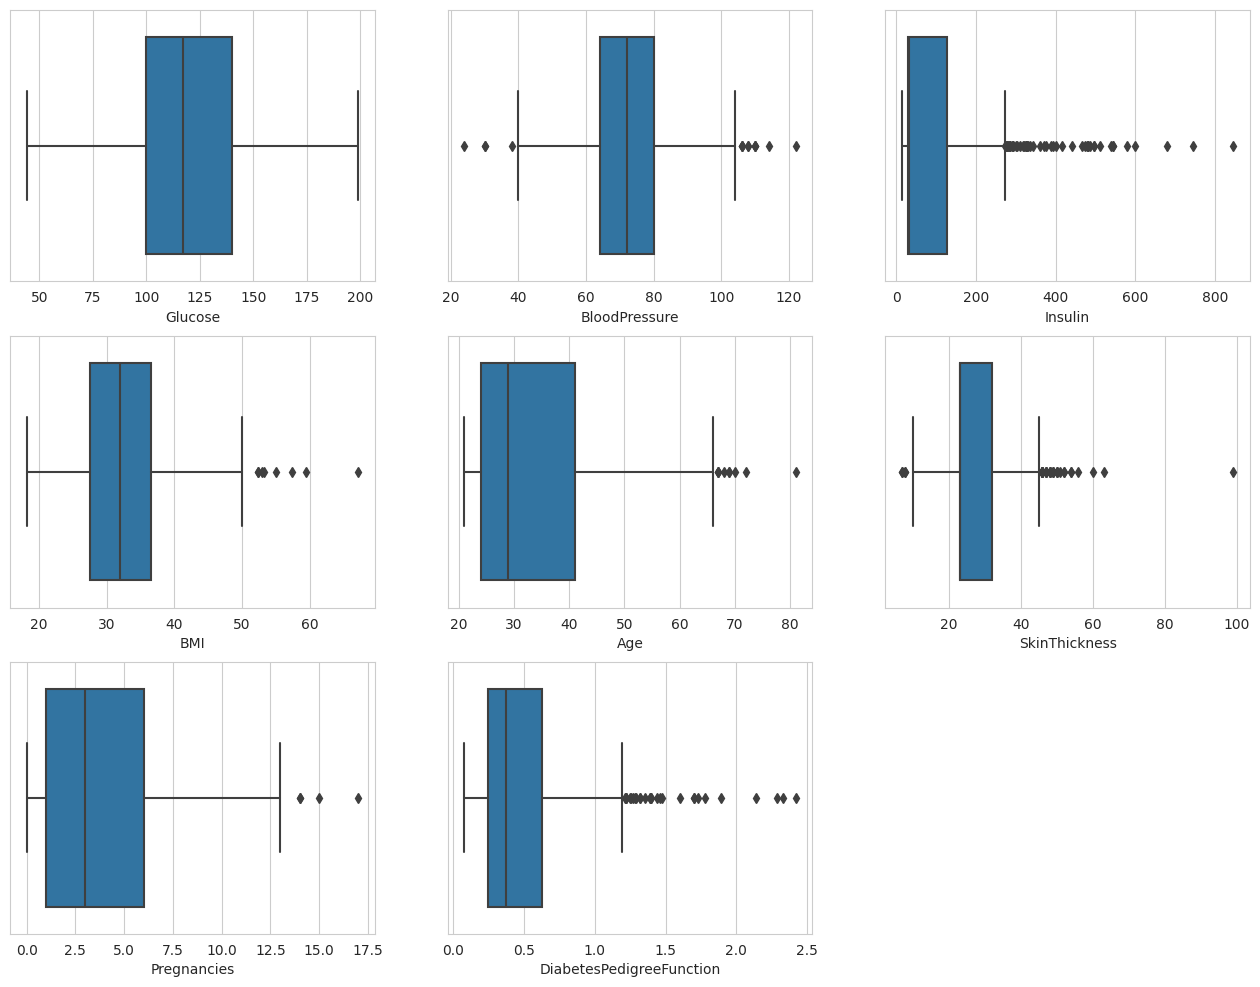

In [15]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

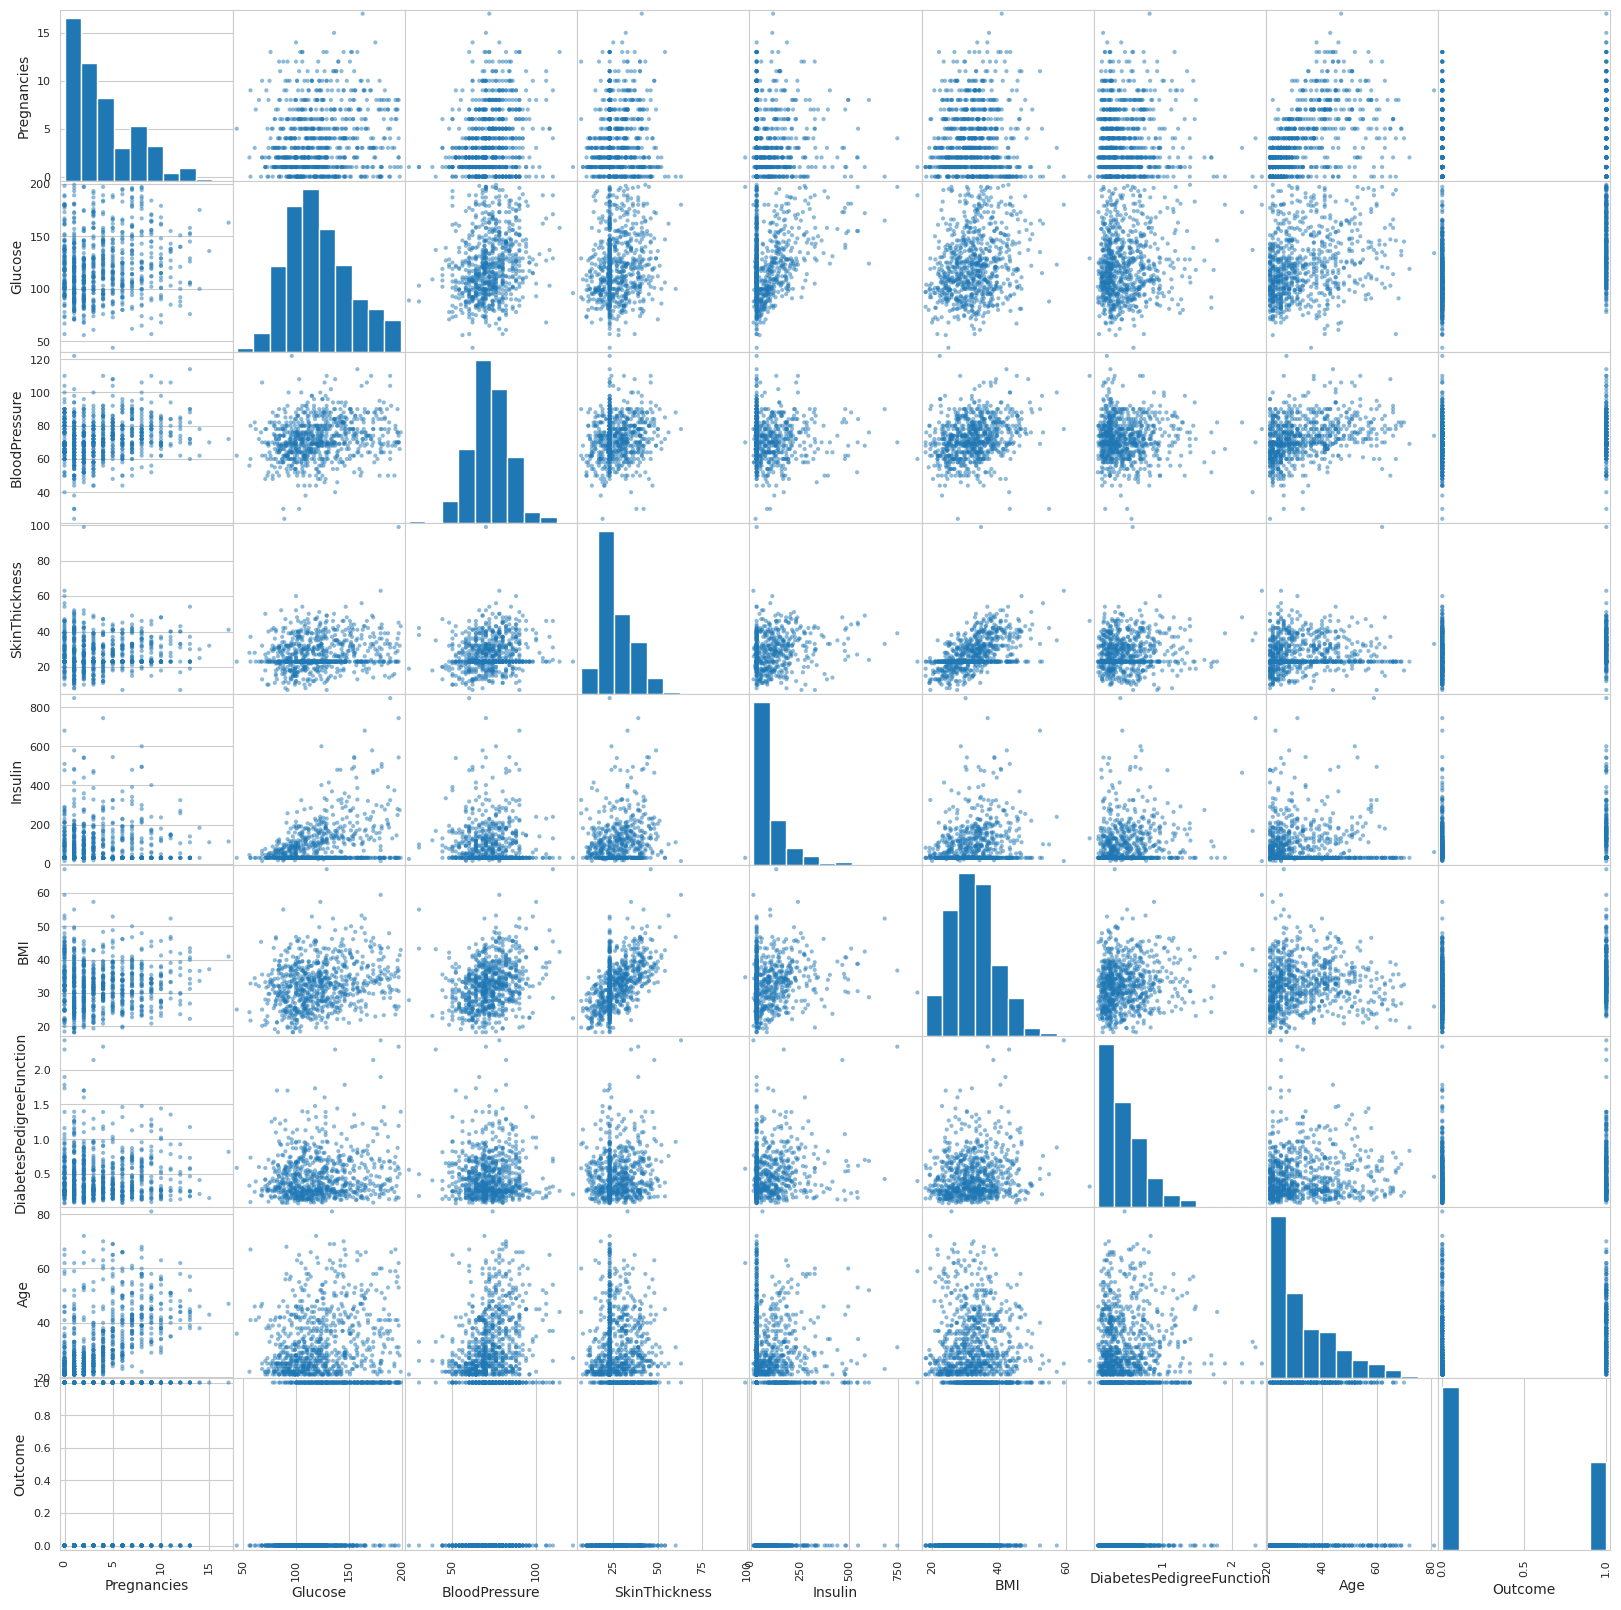

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

<Axes: xlabel='Outcome', ylabel='Insulin'>

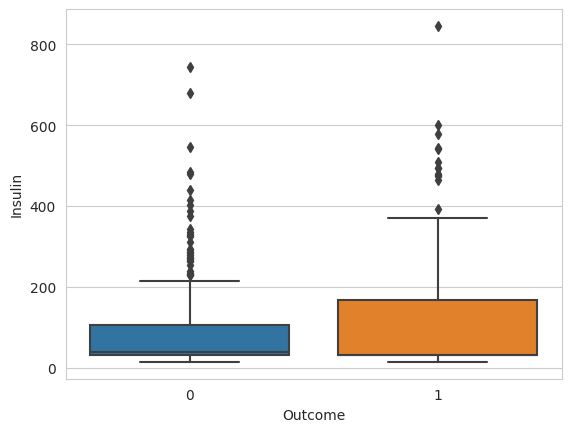

In [17]:
sns.boxplot(x='Outcome',y='Insulin',data=df)

<Axes: xlabel='BMI', ylabel='Glucose'>

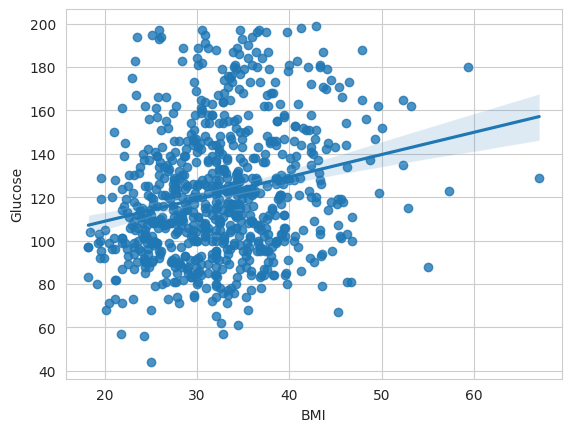

In [18]:
sns.regplot(x='BMI', y= 'Glucose', data=df)

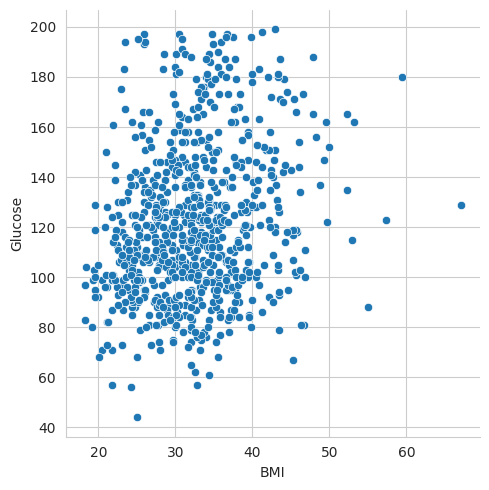

In [19]:
sns.relplot(x='BMI', y= 'Glucose', data=df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

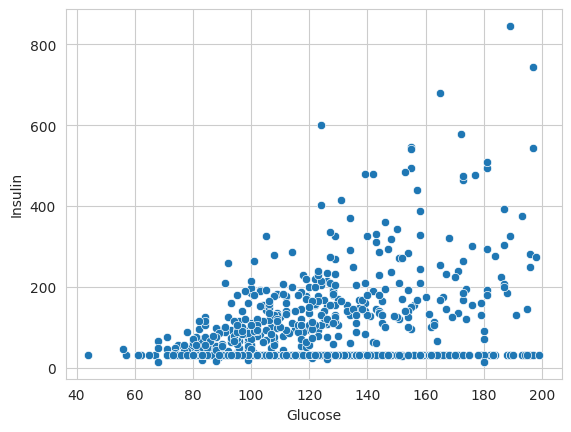

In [20]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=df)

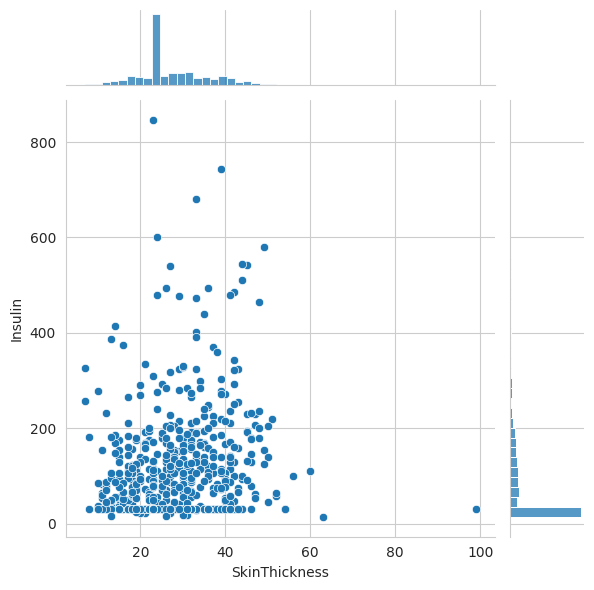

In [21]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=df)

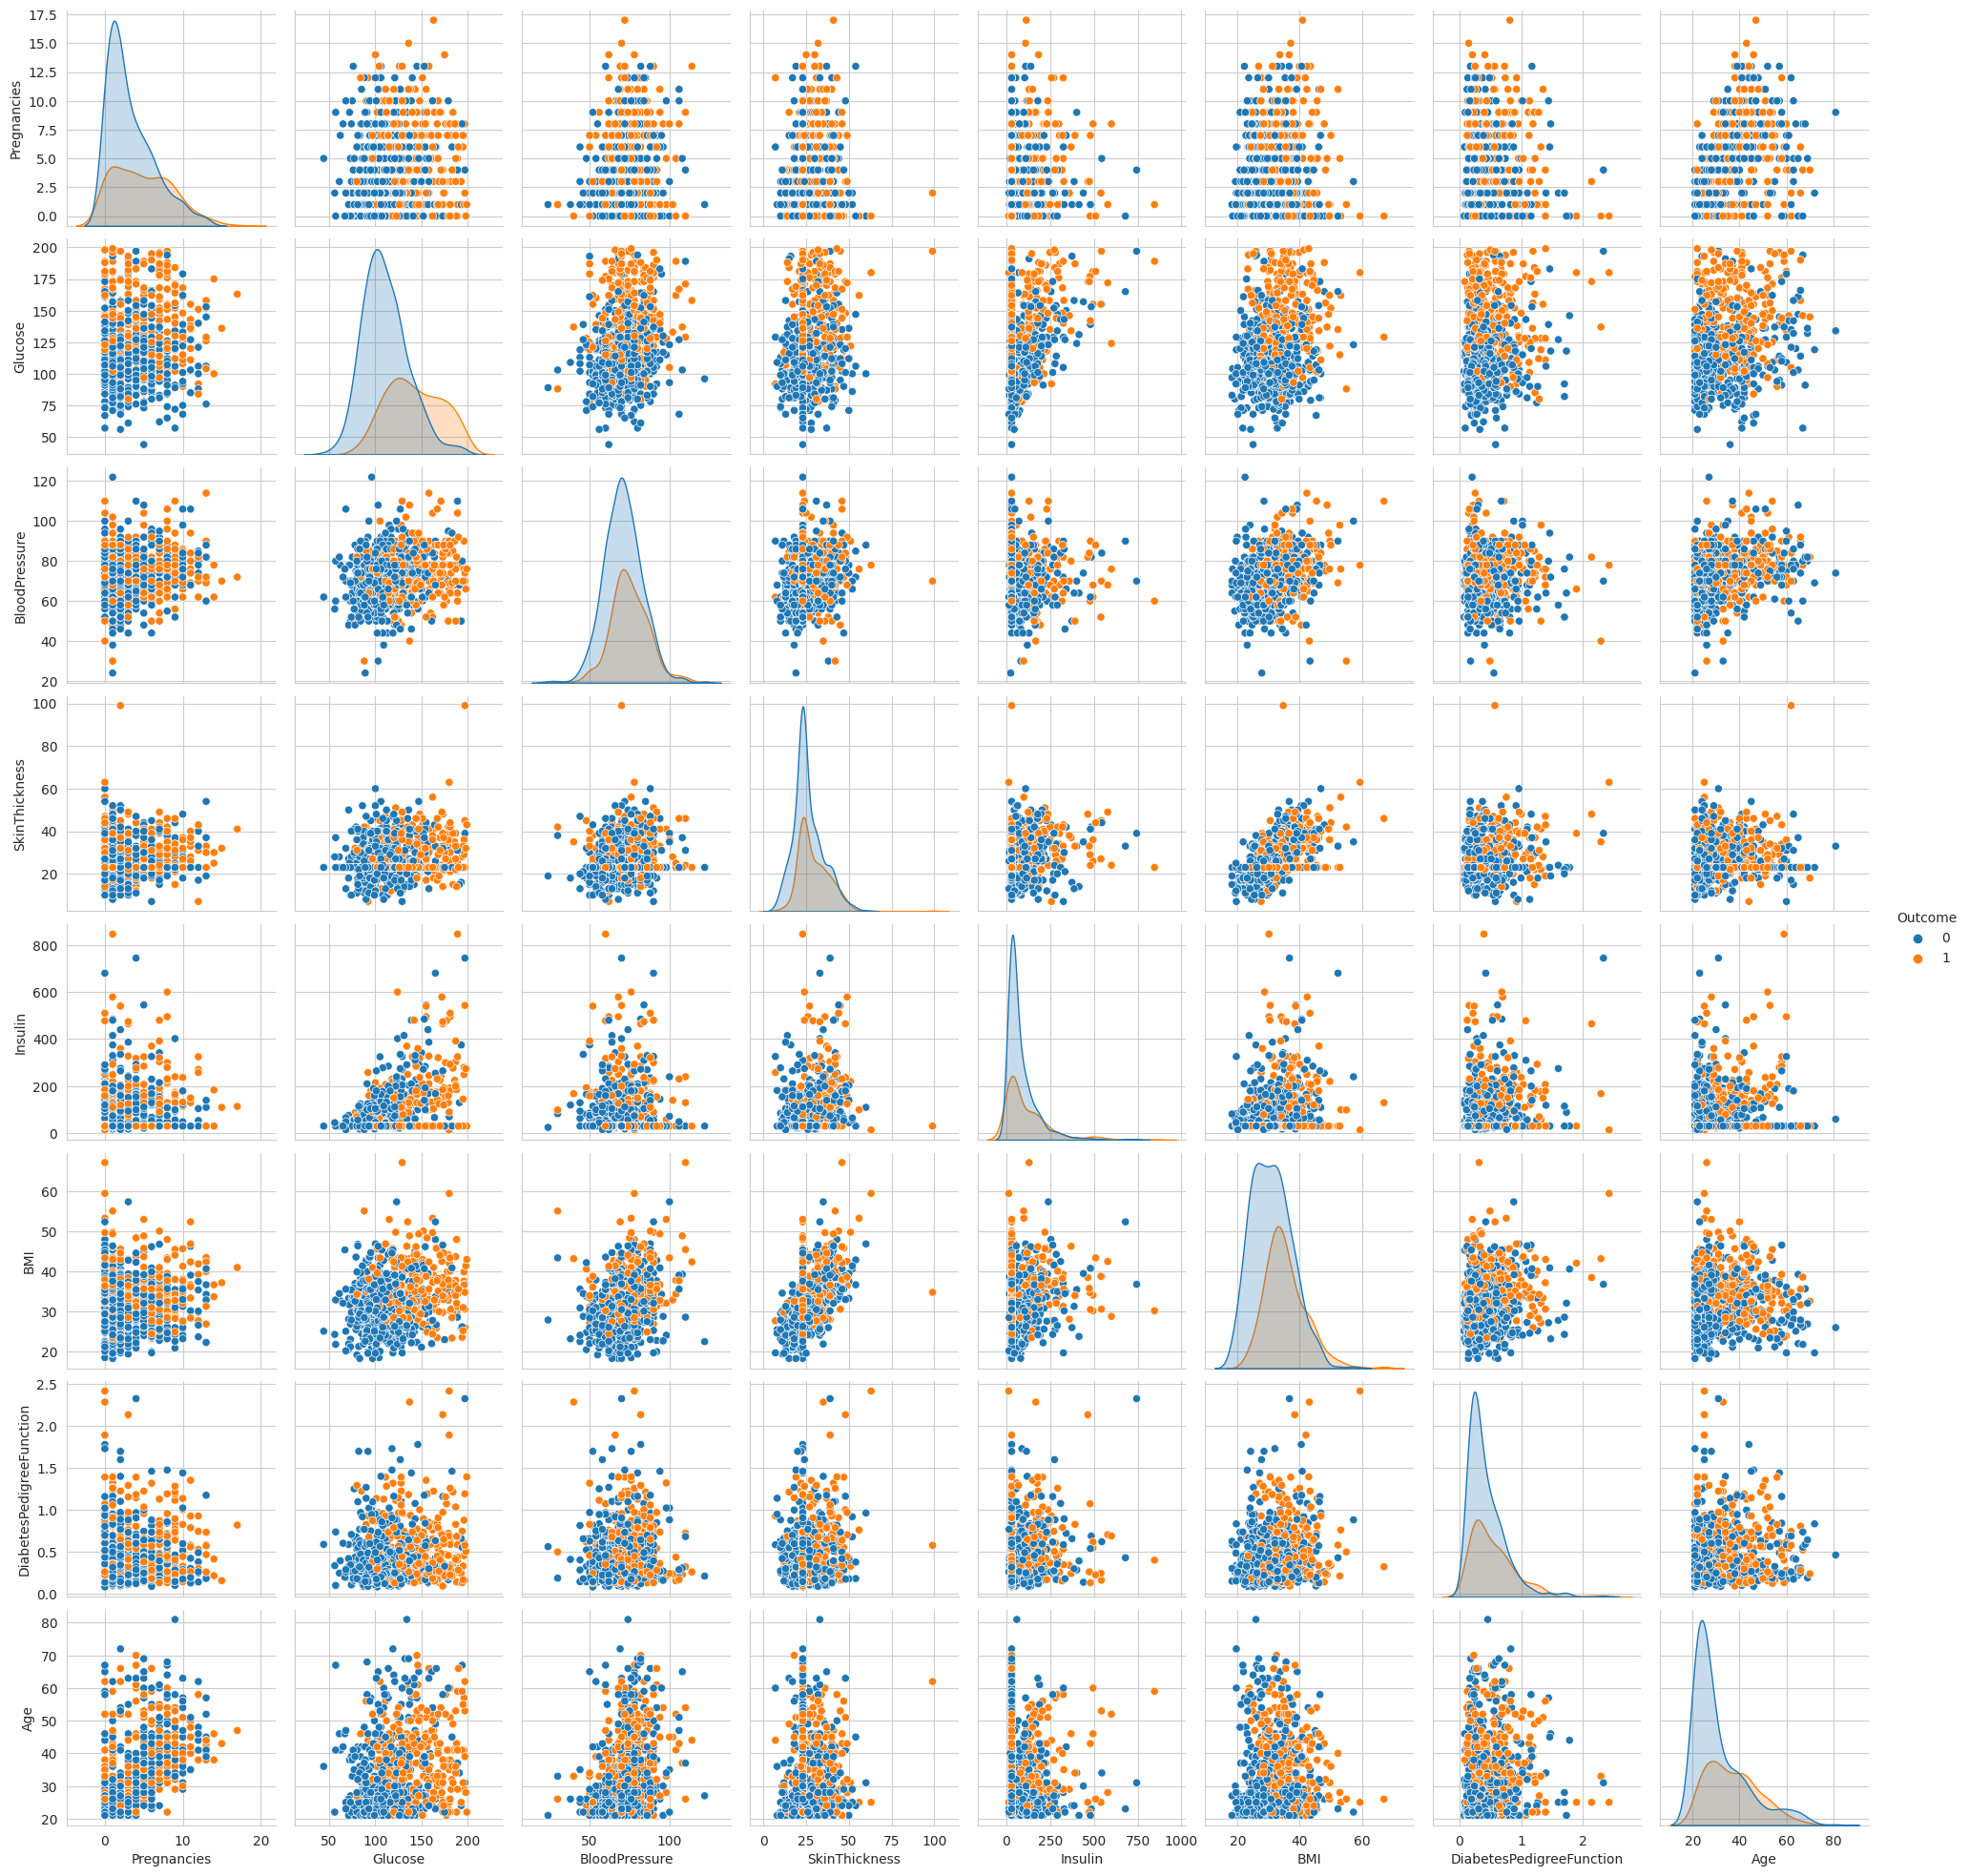

In [22]:
# Perform EDA, explore relationships between variables, and visualize the data
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()


<Axes: xlabel='Glucose', ylabel='Insulin'>

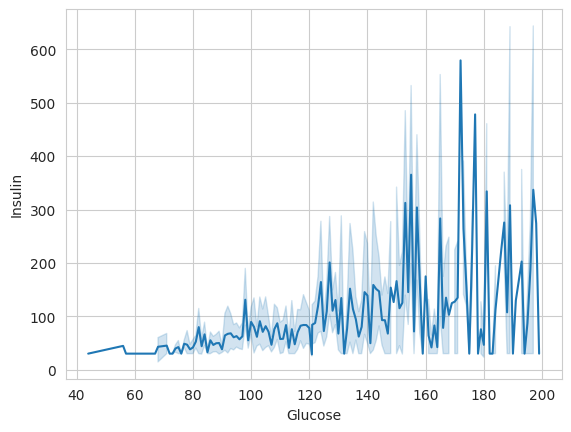

In [23]:
sns.lineplot(x='Glucose', y= 'Insulin', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.4% of the points cannot be plac

<Axes: xlabel='Glucose', ylabel='Insulin'>

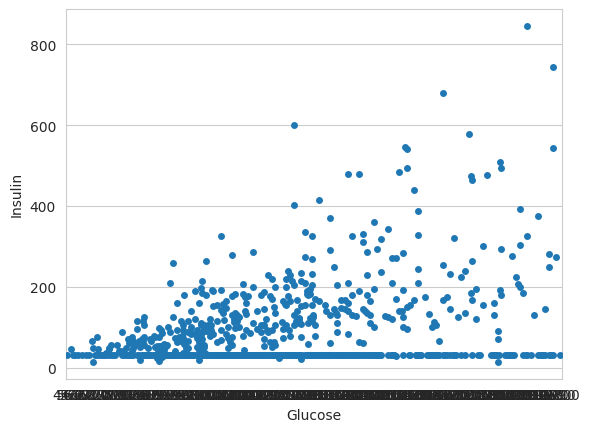

In [24]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=df)

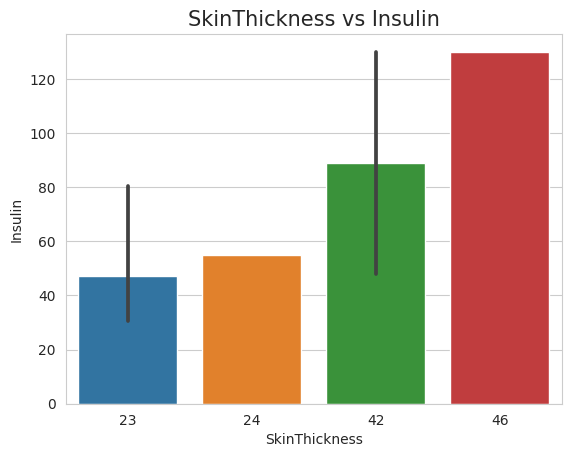

In [25]:
sns.barplot(x="SkinThickness", y="Insulin", data=df[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

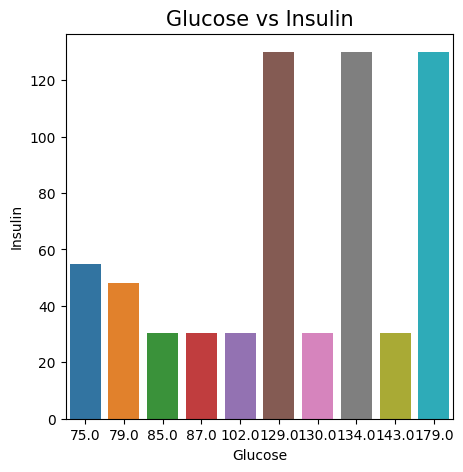

In [26]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=df[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

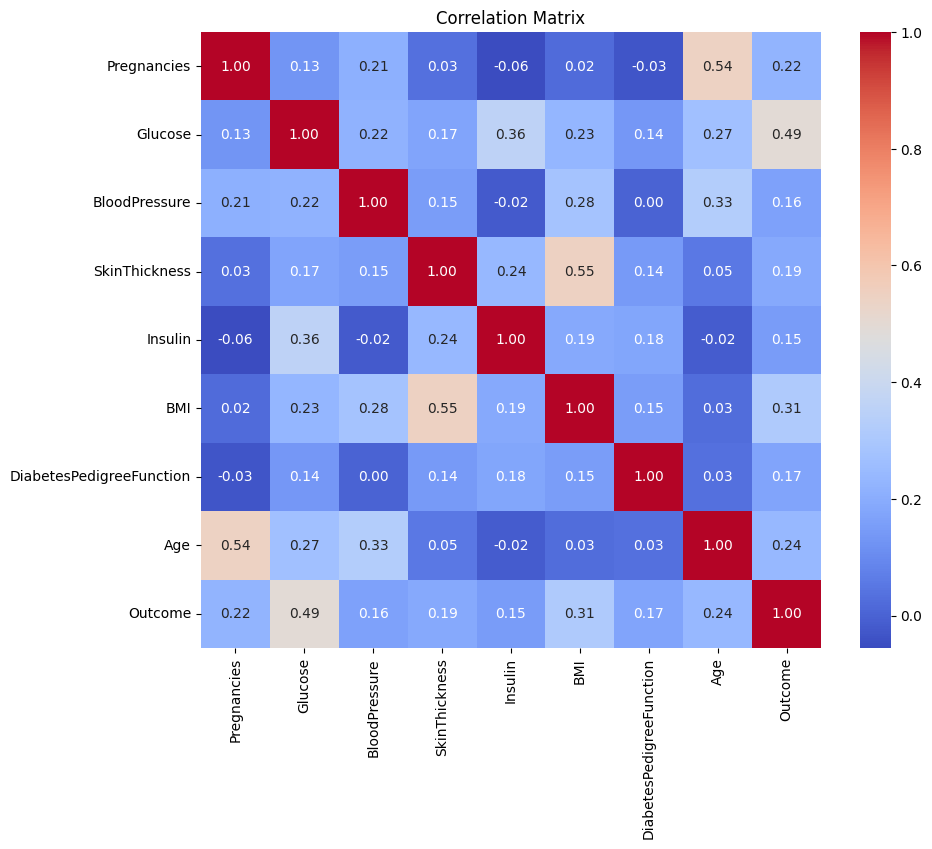

In [27]:
# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [28]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [29]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Pregnancies   Glucose  SkinThickness       BMI       Age  Outcome
0     0.747718  0.810300       0.801825  0.591265  0.889831      1.0
1     0.232725  0.091265       0.644720  0.213168  0.558670      0.0
2     0.863755  0.956975       0.357888  0.077575  0.585398      1.0
3     0.232725  0.124511       0.357888  0.284224  0.000000      0.0
4     0.000000  0.721643       0.801825  0.926988  0.606258      1.0

<Axes: xlabel='SkinThickness'>

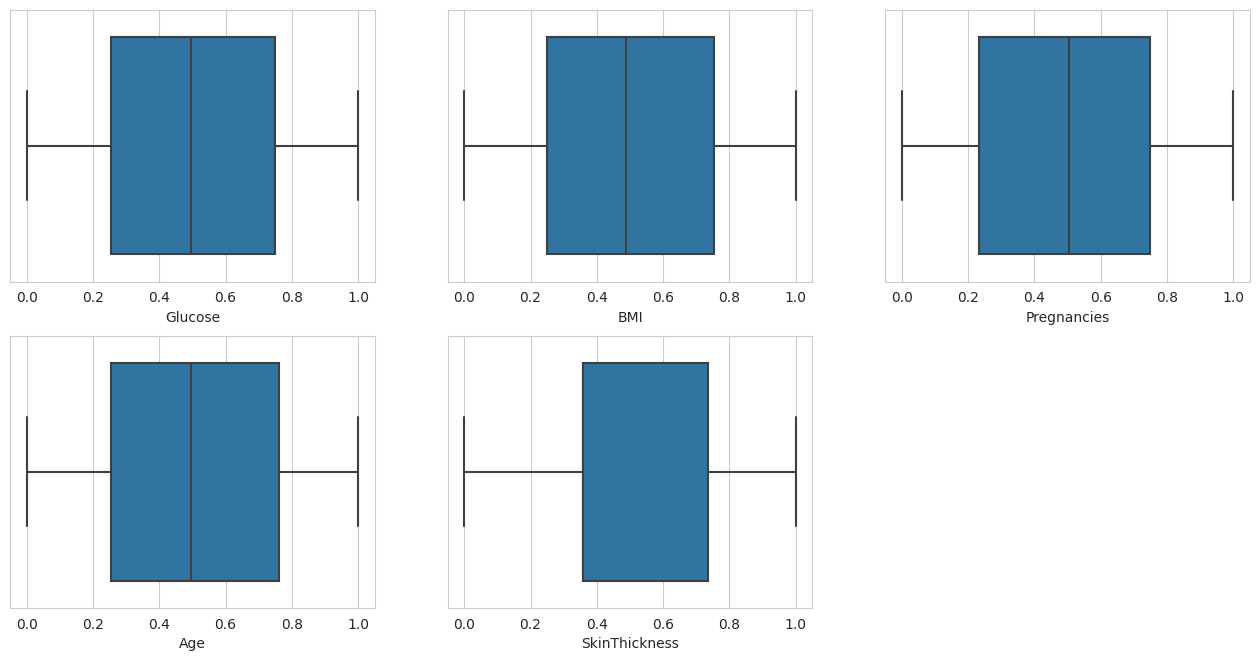

In [30]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

**TRAINING AND TESTING DATA**


In [31]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [32]:
X.head() # contains only independent features

Pregnancies   Glucose  SkinThickness       BMI       Age
0     0.747718  0.810300       0.801825  0.591265  0.889831
1     0.232725  0.091265       0.644720  0.213168  0.558670
2     0.863755  0.956975       0.357888  0.077575  0.585398
3     0.232725  0.124511       0.357888  0.284224  0.000000
4     0.000000  0.721643       0.801825  0.926988  0.606258

In [33]:
y.head() #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [34]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [35]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [36]:
X_test.shape,y_test.shape

((154, 5), (154,))

**Classification Algorithms**


**Logistical regression** is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no."

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[95 12]
 [20 27]]
Training Score:
 76.2214983713355
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


<Axes: >

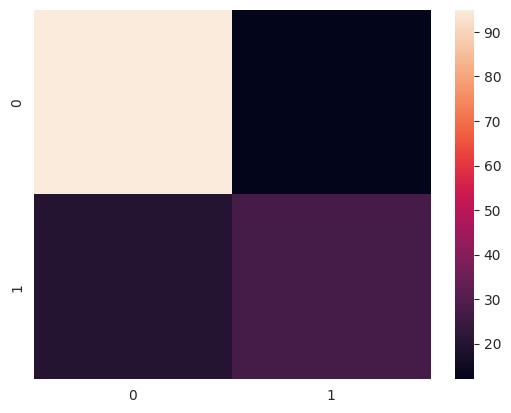

In [38]:
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [39]:
print(accuracy_score(y_test,y_pred)*100)

79.22077922077922


So we get a accuracy score of 79.22 % using Logistic Regression

**KNeighborsClassifier**

In [40]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       107
         1.0       0.63      0.57      0.60        47

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
 [[91 16]
 [20 27]]
Training Score:
 78.99022801302932
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.10240604493935179


<Axes: >

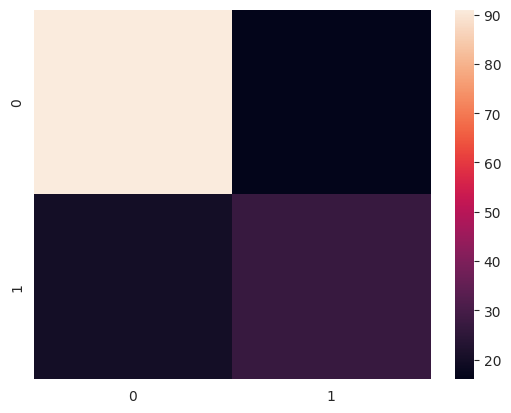

In [41]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [42]:
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


So we get a accuracy score of 76.62 % using KNeighborsClassifier

**SVC**

In [43]:
# SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       107
         1.0       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[93 14]
 [21 26]]
Training Score:
 78.0130293159609
Mean Squared Error:
 0.22727272727272727
R2 score is:
 -0.07178365480214755


<Axes: >

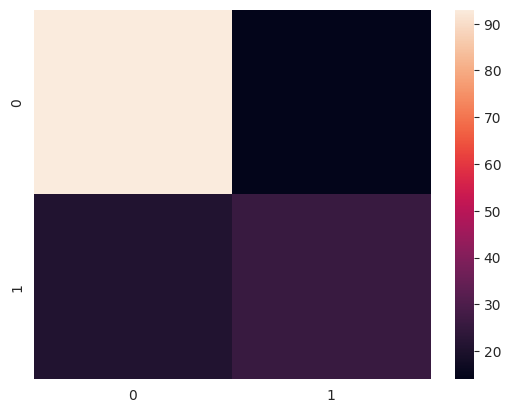

In [44]:
y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [45]:
print(accuracy_score(y_test,y_pred)*100)

77.27272727272727


So we get a accuracy score of 77.27 % using SVC

**Naive Bayes**

In [46]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[87 20]
 [16 31]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.10240604493935179


<Axes: >

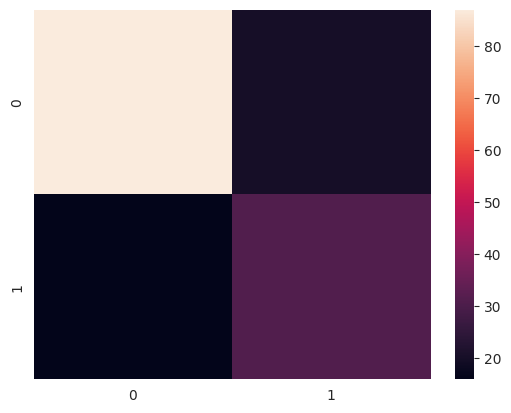

In [47]:
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [48]:
print("Accuracy Score:\n",gnb.score(X_train,y_train)*100)

Accuracy Score:
 75.8957654723127


So we get a accuracy score of 75.89 % using Naiye Bayes

**DECISION TREE CLASSIFIER**

In [49]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       107
         1.0       0.65      0.51      0.57        47

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
 [[94 13]
 [23 24]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.10240604493935179


<Axes: >

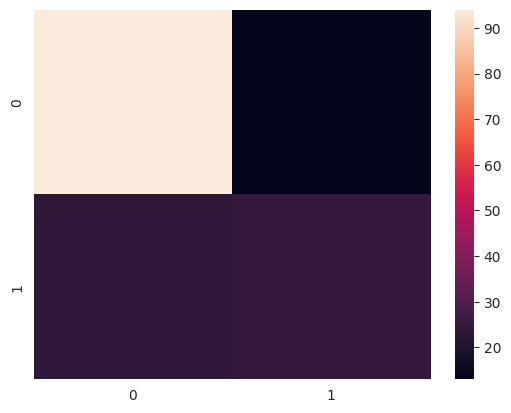

In [50]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [51]:
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


So we get accuracy score of 76.62 % using DecisionTreeClassifier

**RandomForestClassifier**

In [52]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       107
         1.0       0.64      0.62      0.63        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[91 16]
 [18 29]]
Training Score:
 100.0
Mean Squared Error:
 0.22077922077922077
R2 score is:
 -0.0411612646649433


<Axes: >

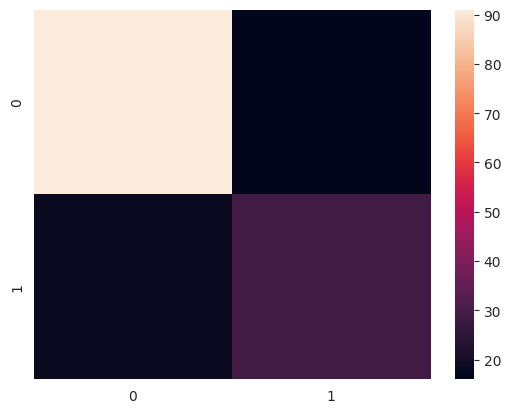

In [53]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred))

In [54]:
print(accuracy_score(y_test,y_pred)*100)

77.92207792207793


So we get a accuracy score of 79.22 % using RandomForestClassifier

So now we conclude the accuracy of different models:

* Logistic Regression= 79.22 %
* KNeighbors Classifier= 76.62 %
* SVC=  77.27 %
* Naiye Bayes= 75.89 %
* Decision Tree Classifier= 76.62 %
* RandomForestClassifier=79.22%

